# Questions
1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

4. What is the gradient of the following function with respect to x and y?

   $$
    f(x,y) \;=\; x^{2}\,y \;+\; y^{3}\,\sin(x).
   $$

6. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

7. Use sympy to confirm that you obtain the same gradient analytically.

8. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

    1. 2022
        1. Branch 1
            1. Roll Number: 1, Name: N, Marks:
                1. Maths: 100, English: 70 …
        2. Branch 2
    2. 2023
        1. Branch 1
        2. Branch 2
    3. 2024
        1. Branch 1
        2. Branch 2
    4. 2025
        1. Branch 1
        2. Branch 2

9. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

10. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
  
    * "y = x"
    * "y = x²"
    * "y = x³/100"
    * "y = sin(x)"
    * "y = (sin(x))/x"
    * "y = \log(x)"
    * "y = e^{x}"

 
 
12. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

13. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

14. Write a small piece of code to explain broadcasting in numpy.

15. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

# Question 1

### Answer 1:

**Given:** Matrix A (n, k) and B (k, m).

**To find:** No. of multiplications and additions required to perform a matrix multiplication b/w A and B.

We know, The resulting matrix will have dimensions \(n,m\).

**How to solve**                

Calculate the operations for each element of the resulting matrix, then sum them up for the total.      

1. Determine the number of elements in the resulting matrix.

   The product of an \(n,k\) matrix and a \(m,k\) matrix is an \(n,m\) matrix.

   The total number of elements in the resulting matrix is \(n x m\).
  
4. Calculate operations for a single element of the resulting matrix.

   Each element of the resulting matrix is a dot product of a row from the first matrix and a column from the second matrix.

   Each dot product involves \(k\) multiplications.

   Each dot product involves \(k-1\) additions.

6. Calculate total multiplications.

   Total multiplications = (number of elements in result) x (multiplications per element).

   Total multiplications = (n x k x m).

8. Calculate total additions.

   Total additions = (number of elements in result) x (additions per element).

   Total additions = \(n x m x (k-1)\).


**Therefore, the matrix multiplication requires \(n x m x k\) multiplications and \(n x m x (k-1)\) additions.**

# Question 2

In [63]:
import numpy as np
import time

def matrix_multiply_lists(A, B):
    """Matrix multiplication using Python lists"""
    n, k = len(A), len(A[0])
    k2, m = len(B), len(B[0])
    
    if k != k2:
        raise ValueError("Incompatible dimensions")
    
    # Initialize result matrix
    C = [[0 for _ in range(m)] for _ in range(n)]
    
    # Triple nested loop - O(n*k*m)
    for i in range(n):
        for j in range(m):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]
    
    return C

def matrix_multiply_numpy(A, B):
    """Matrix multiplication using NumPy"""
    return np.dot(A, B)

# Performance comparison
n, k, m = 100, 50, 75

# Create random matrices
A_list = [[np.random.random() for _ in range(k)] for _ in range(n)]
B_list = [[np.random.random() for _ in range(m)] for _ in range(k)]

A_numpy = np.random.random((n, k))
B_numpy = np.random.random((k, m))

# Time Python lists approach
start_time = time.time()
result_list = matrix_multiply_lists(A_list, B_list)
list_time = time.time() - start_time

# Time NumPy approach
start_time = time.time()
result_numpy = matrix_multiply_numpy(A_numpy, B_numpy)
numpy_time = time.time() - start_time

print(f"Python lists time: {list_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")
print(f"NumPy is {list_time/numpy_time:.1f}x faster")


Python lists time: 0.051301 seconds
NumPy time: 0.000396 seconds
NumPy is 129.7x faster


**Why NumPy is faster:** NumPy uses optimized C implementations, vectorized operations, and better memory layout compared to Python lists.

# Question 3

**Time Complexity Analysis**

Finding the second highest using two passes:

1. First pass: Find maximum (O(n))
2. Second pass: Find maximum excluding the first maximum (O(n))
3. Total: O(n)

Finding the median using this approach:

1. To find the kth largest element, we need k passes
2. For median (n/2th element), we need n/2 passes
3. Time complexity: O(n²)

**Better Approach: Quickselect Algorithm**
The quickselect algorithm can find the median in O(n) average time complexity.

In [64]:
import numpy as np
import time
import random

def find_second_highest_two_pass(arr):
    """Find second highest using two passes - O(n)"""
    if len(arr) < 2:
        return None
    
    # First pass: find maximum
    max_val = max(arr)
    
    # Second pass: find maximum excluding the first maximum
    second_max = float('-inf')
    for val in arr:
        if val != max_val and val > second_max:
            second_max = val
    
    return second_max if second_max != float('-inf') else None

def find_median_naive(arr):
    """Find median using naive approach - O(n²)"""
    n = len(arr)
    target = n // 2
    
    result = []
    temp_arr = arr.copy()
    
    # Find target-th smallest element
    for _ in range(target + 1):
        min_val = min(temp_arr)
        result.append(min_val)
        temp_arr.remove(min_val)
    
    return result[-1]

def quickselect(arr, k):
    """Quickselect algorithm - O(n) average case"""
    if len(arr) == 1:
        return arr[0]
    
    pivot = random.choice(arr)
    
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    
    if k < len(less):
        return quickselect(less, k)
    elif k < len(less) + len(equal):
        return equal[0]
    else:
        return quickselect(greater, k - len(less) - len(equal))

def find_median_quickselect(arr):
    """Find median using quickselect - O(n) average"""
    n = len(arr)
    return quickselect(arr, n // 2)


sizes = [1000, 5000, 10000]

for size in sizes:
    arr = [random.randint(1, 1000) for _ in range(size)]
    
    # Time naive approach
    start = time.time()
    median_naive = find_median_naive(arr)
    naive_time = time.time() - start
    
    # Time quickselect approach
    start = time.time()
    median_quick = find_median_quickselect(arr)
    quick_time = time.time() - start
    
    # Time NumPy
    start = time.time()
    median_numpy = np.median(arr)
    numpy_time = time.time() - start
    
    print(f"Array size: {size}")
    print(f"Naive approach: {naive_time:.6f}s")
    print(f"Quickselect: {quick_time:.6f}s") 
    print(f"NumPy: {numpy_time:.6f}s")
    print(f"Results - Naive: {median_naive}, Quick: {median_quick}, NumPy: {median_numpy}")
    print()


Array size: 1000
Naive approach: 0.010433s
Quickselect: 0.000376s
NumPy: 0.000441s
Results - Naive: 489, Quick: 489, NumPy: 489.0

Array size: 5000
Naive approach: 0.207282s
Quickselect: 0.001438s
NumPy: 0.000594s
Results - Naive: 510, Quick: 510, NumPy: 510.0

Array size: 10000
Naive approach: 0.794983s
Quickselect: 0.004029s
NumPy: 0.000914s
Results - Naive: 501, Quick: 501, NumPy: 501.0



# Question 4
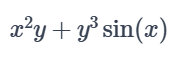

**Question 4: Analytical Gradient**

Let  
$$
f(x,y) \;=\; x^{2}\,y \;+\; y^{3}\,\sin(x).
$$

1. Compute $$\partial f/\partial x$$:  
   $$
   \frac{\partial}{\partial x}\bigl(x^{2}y\bigr)
     = 2x\,y,
   \qquad
   \frac{\partial}{\partial x}\bigl(y^{3}\sin x\bigr)
     = y^{3}\cos x.
   $$
   Hence  
   $$
   \frac{\partial f}{\partial x}
   = 2x\,y \;+\; y^{3}\cos x.
   $$

2. Compute $$\partial f/\partial y$$:  
   $$
   \frac{\partial}{\partial y}\bigl(x^{2}y\bigr)
     = x^{2},
   \qquad
   \frac{\partial}{\partial y}\bigl(y^{3}\sin x\bigr)
     = 3y^{2}\sin x.
   $$
   Hence  
   $$
   \frac{\partial f}{\partial y}
   = x^{2} \;+\; 3y^{2}\sin x.
   $$

***

**Final result:**

$$
\nabla f(x,y)
=\bigl(2xy + y^{3}\cos x,\; x^{2} + 3y^{2}\sin x\bigr).
$$

# Question 5


In [65]:
import jax
import jax.numpy as jnp
from jax import grad
import numpy as np

# Define the function f(x,y) = x²y + y³sin(x)
def f_jax(params):
    x, y = params
    return x**2 * y + y**3 * jnp.sin(x)

# Create the gradient function
grad_f = grad(f_jax)

# Define our analytical gradient for comparison
def analytical_gradient(x, y):
    grad_x = 2*x*y + y**3 * np.cos(x)
    grad_y = x**2 + 3*y**2 * np.sin(x)
    return np.array([grad_x, grad_y])

print("Verifying gradients with JAX:")
print("=" * 50)

# Test with several random values
for i in range(5):
    x_test = np.random.uniform(-3, 3)
    y_test = np.random.uniform(-3, 3)

    jax_grad = grad_f(jnp.array([x_test, y_test]))
    analytical_grad = analytical_gradient(x_test, y_test)

    # This checks if the gradients are close within numerical tolerance:
    match = np.allclose(jax_grad, analytical_grad, rtol=1e-6, atol=1e-6)

    print(f"Test {i+1}:")
    print(f"  x = {x_test:.4f}, y = {y_test:.4f}")
    print(f"  JAX gradient:        [{jax_grad[0]:.4f}, {jax_grad[1]:.4f}]")
    print(f"  Analytical gradient: [{analytical_grad[0]:.4f}, {analytical_grad[1]:.4f}]")
    print(f"  Match: {'✓' if match else '✗'}\n")
    print()

print("Gradient formula verification:")
print("∂f/∂x = 2xy + y³cos(x)")
print("∂f/∂y = x² + 3y²sin(x)")


Verifying gradients with JAX:
Test 1:
  x = -2.9185, y = 0.2496
  JAX gradient:        [-1.4720, 8.4761]
  Analytical gradient: [-1.4720, 8.4761]
  Match: ✓


Test 2:
  x = -2.4248, y = 2.1497
  JAX gradient:        [-17.9145, -3.2287]
  Analytical gradient: [-17.9145, -3.2287]
  Match: ✓


Test 3:
  x = -2.9396, y = -2.6972
  JAX gradient:        [35.0791, 4.2624]
  Analytical gradient: [35.0791, 4.2624]
  Match: ✓


Test 4:
  x = 1.6104, y = -1.0608
  JAX gradient:        [-3.3694, 5.9667]
  Analytical gradient: [-3.3694, 5.9667]
  Match: ✓


Test 5:
  x = 2.8195, y = -2.5243
  JAX gradient:        [1.0233, 14.0008]
  Analytical gradient: [1.0233, 14.0008]
  Match: ✓


Gradient formula verification:
∂f/∂x = 2xy + y³cos(x)
∂f/∂y = x² + 3y²sin(x)


# Question 6

In [66]:
import sympy as sp
import numpy as np

# Define symbols
x, y = sp.symbols('x y')

# Define the function f(x, y) = x^2 * y + y^3 * sin(x)
f = x**2 * y + y**3 * sp.sin(x)

# Compute symbolic partial derivatives
grad_fx = sp.diff(f, x)
grad_fy = sp.diff(f, y)

print("Symbolic ∂f/∂x =", grad_fx)
print("Symbolic ∂f/∂y =", grad_fy)
print()

# Convert to numerical functions for evaluation
grad_fx_num = sp.lambdify((x, y), grad_fx, 'numpy')
grad_fy_num = sp.lambdify((x, y), grad_fy, 'numpy')

# Analytical functions for comparison
def analytical_grad(x_val, y_val):
    return np.array([
        2*x_val*y_val + y_val**3 * np.cos(x_val),
        x_val**2 + 3*y_val**2 * np.sin(x_val)
    ])

# Test on random points
print("Numeric comparison at random points:")
for _ in range(5):
    xv = np.random.uniform(-2, 2)
    yv = np.random.uniform(-2, 2)
    sym_grad = np.array([grad_fx_num(xv, yv), grad_fy_num(xv, yv)])
    an_grad  = analytical_grad(xv, yv)
    match = np.allclose(sym_grad, an_grad, atol=1e-12)
    print(f"(x,y)=({xv:+.3f},{yv:+.3f})  SymPy: {sym_grad},  Analytical: {an_grad},  Match: {match}")


Symbolic ∂f/∂x = 2*x*y + y**3*cos(x)
Symbolic ∂f/∂y = x**2 + 3*y**2*sin(x)

Numeric comparison at random points:
(x,y)=(-0.145,+1.168)  SymPy: [ 1.23576698 -0.57091331],  Analytical: [ 1.23576698 -0.57091331],  Match: True
(x,y)=(+1.260,+1.761)  SymPy: [ 6.10737275 10.44608848],  Analytical: [ 6.10737275 10.44608848],  Match: True
(x,y)=(+0.806,-1.919)  SymPy: [-7.98976549  8.61942285],  Analytical: [-7.98976549  8.61942285],  Match: True
(x,y)=(+1.447,-0.314)  SymPy: [-0.91244695  2.38672573],  Analytical: [-0.91244695  2.38672573],  Match: True
(x,y)=(-1.939,+1.866)  SymPy: [-9.57276092 -5.99092796],  Analytical: [-9.57276092 -5.99092796],  Match: True


# Question 7

In [67]:
# Nested dictionary structure
student_records = {
    2022: {
        "Branch 1": {
            1: {
                "name": "Alice Johnson", 
                "marks": {"Maths": 95, "English": 88, "Physics": 92}
            },
            2: {
                "name": "Bob Smith", 
                "marks": {"Maths": 87, "English": 79, "Physics": 85}
            }
        },
        "Branch 2": {
            3: {
                "name": "Carol Davis", 
                "marks": {"Maths": 91, "English": 94, "Physics": 89}
            }
        }
    },
    2023: {
        "Branch 1": {
            4: {
                "name": "David Wilson", 
                "marks": {"Maths": 88, "English": 85, "Physics": 90}
            }
        },
        "Branch 2": {
            5: {
                "name": "Eva Brown", 
                "marks": {"Maths": 93, "English": 91, "Physics": 87}
            }
        }
    }
}

# Access example
print("Student record access:")
print(f"Roll 1 in Branch 1, 2022: {student_records[2022]['Branch 1'][1]}")


Student record access:
Roll 1 in Branch 1, 2022: {'name': 'Alice Johnson', 'marks': {'Maths': 95, 'English': 88, 'Physics': 92}}


# Question 8

In [68]:
class Student:
    def __init__(self, roll_number, name, marks=None):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks if marks else {}
    
    def add_mark(self, subject, mark):
        self.marks[subject] = mark
    
    def get_average(self):
        if not self.marks:
            return 0
        return sum(self.marks.values()) / len(self.marks)
    
    def __str__(self):
        return f"Student(Roll: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    
    def add_student(self, student):
        self.students.append(student)
    
    def find_student_by_roll(self, roll_number):
        for student in self.students:
            if student.roll_number == roll_number:
                return student
        return None
    
    def get_branch_average(self):
        if not self.students:
            return 0
        total_avg = sum(student.get_average() for student in self.students)
        return total_avg / len(self.students)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    
    def add_branch(self, branch):
        self.branches.append(branch)
    
    def find_branch_by_name(self, name):
        for branch in self.branches:
            if branch.name == name:
                return branch
        return None

class Database:
    def __init__(self):
        self.years = []
    
    def add_year(self, year):
        self.years.append(year)
    
    def find_year(self, year_number):
        for year in self.years:
            if year.year == year_number:
                return year
        return None
    
    def get_student(self, year_number, branch_name, roll_number):
        year = self.find_year(year_number)
        if year:
            branch = year.find_branch_by_name(branch_name)
            if branch:
                return branch.find_student_by_roll(roll_number)
        return None

# Create database and populate with sample data
db = Database()

# Create 2022 data
year_2022 = Year(2022)

branch1_2022 = Branch("Branch 1")
student1 = Student(1, "Alice Johnson", {"Maths": 95, "English": 88, "Physics": 92})
student2 = Student(2, "Bob Smith", {"Maths": 87, "English": 79, "Physics": 85})
branch1_2022.add_student(student1)
branch1_2022.add_student(student2)

branch2_2022 = Branch("Branch 2")
student3 = Student(3, "Carol Davis", {"Maths": 91, "English": 94, "Physics": 89})
branch2_2022.add_student(student3)

year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)
db.add_year(year_2022)

# Usage example
print("Class-based approach:")
found_student = db.get_student(2022, "Branch 1", 1)
if found_student:
    print(f"Found: {found_student}")
    print(f"Average marks: {found_student.get_average():.2f}")


Class-based approach:
Found: Student(Roll: 1, Name: Alice Johnson, Marks: {'Maths': 95, 'English': 88, 'Physics': 92})
Average marks: 91.67


# Question 9

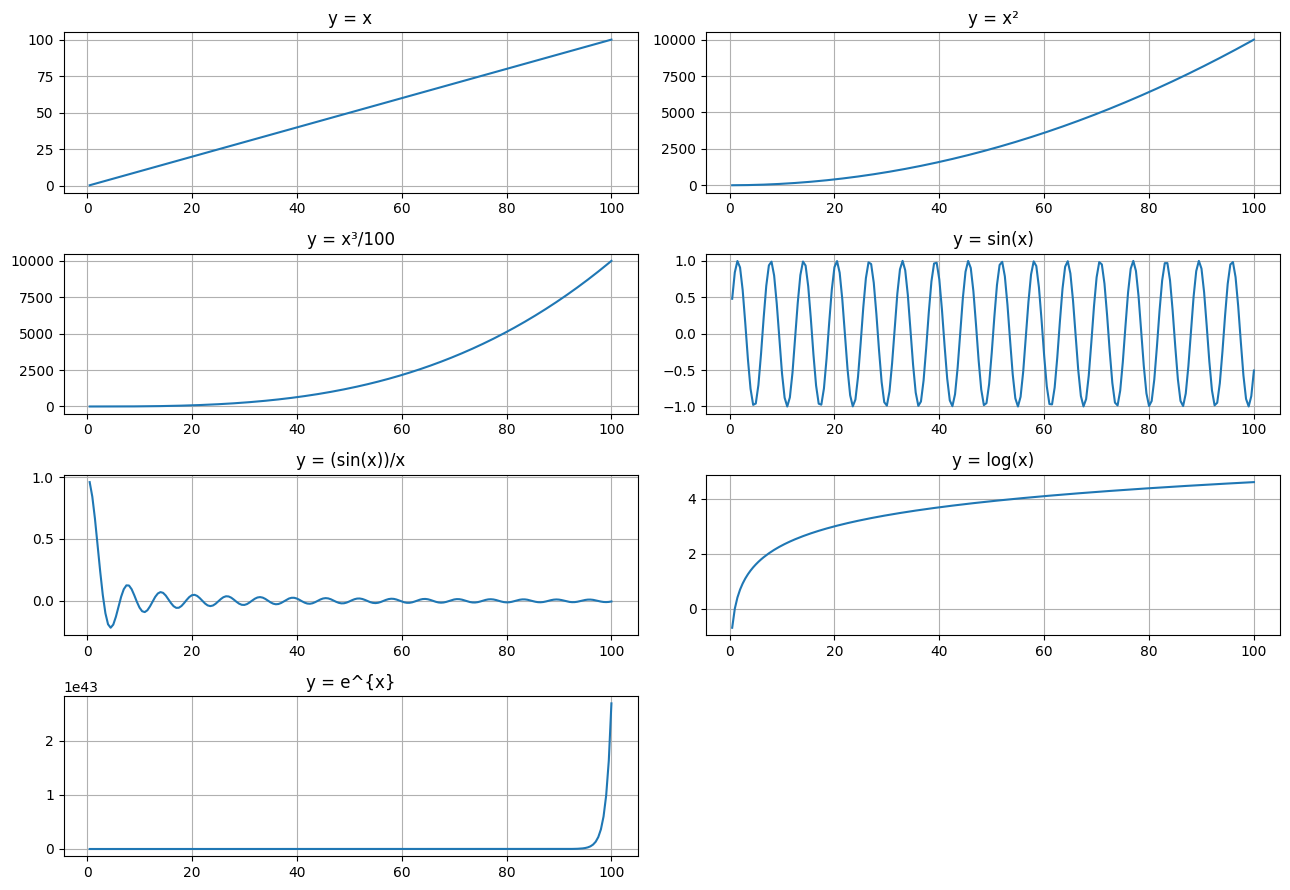

In [69]:
import numpy as np, matplotlib.pyplot as plt
x = np.arange(0.5, 100.5, 0.5)

functions = {
    "y = x"           : x,
    "y = x²"          : x**2,
    r"y = x³/100"      : (x**3)/100,
    r"y = sin(x)"    : np.sin(x),
    r"y = (sin(x))/x"    : (np.sin(x))/x,
    r"y = log(x)"    : np.log(x),
    r"y = e^{x}"      : np.exp(x)
}

plt.figure(figsize=(13,9))
for i,(label,y) in enumerate(functions.items(),1):
    plt.subplot(4,2,i)
    plt.plot(x,y); plt.title(label); plt.grid(True)
plt.tight_layout(); plt.show()


# Question 10

In [72]:
import pandas as pd
import numpy as np

# Generate random matrix
np.random.seed(42)  # For reproducible results
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create DataFrame
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

print("DataFrame info:")
print(df.head())
print(f"Shape: {df.shape}")

# Find column with highest standard deviation
std_devs = df.std()
highest_std_col = std_devs.idxmax()
print(f"\nStandard deviations:\n{std_devs}")
print(f"Column with highest standard deviation: {highest_std_col} (std = {std_devs[highest_std_col]:.4f})")

# Find row with lowest mean
row_means = df.mean(axis=1)
lowest_mean_row = row_means.idxmin()
print(f"\nRow means:\n{row_means.head(20)}")
print(f"Row with lowest mean: {lowest_mean_row} (mean = {row_means[lowest_mean_row]:.4f})")

DataFrame info:
          a         b         c         d         e
0  1.374540  1.950714  1.731994  1.598658  1.156019
1  1.155995  1.058084  1.866176  1.601115  1.708073
2  1.020584  1.969910  1.832443  1.212339  1.181825
3  1.183405  1.304242  1.524756  1.431945  1.291229
4  1.611853  1.139494  1.292145  1.366362  1.456070
Shape: (20, 5)

Standard deviations:
a    0.296459
b    0.297794
c    0.318628
d    0.307113
e    0.284463
dtype: float64
Column with highest standard deviation: c (std = 0.3186)

Row means:
0     1.562385
1     1.477888
2     1.443420
3     1.347115
4     1.373185
5     1.427590
6     1.551528
7     1.467014
8     1.363941
9     1.445173
10    1.835389
11    1.315381
12    1.425290
13    1.509451
14    1.499760
15    1.409731
16    1.438368
17    1.610355
18    1.585174
19    1.315476
dtype: float64
Row with lowest mean: 11 (mean = 1.3154)


# Question 11

In [73]:
# Add column 'f' as sum of all columns
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Add column 'g' based on condition
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

print(f"\nDataFrame with new columns:")
print(df.head())

# Count rows where g is 'LT8'
lt8_count = (df['g'] == 'LT8').sum()
gt8_count = (df['g'] == 'GT8').sum()
print(f"\nRows where g is 'LT8': {lt8_count}")
print(f"Rows where g is 'GT8': {gt8_count}")

# Standard deviation of column 'f' for each group
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print(f"\nStandard deviation of 'f' for LT8 group: {std_lt8:.4f}")
print(f"Standard deviation of 'f' for GT8 group: {std_gt8:.4f}")



DataFrame with new columns:
          a         b         c         d         e         f    g
0  1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1  1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2  1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3  1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4  1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8

Rows where g is 'LT8': 18
Rows where g is 'GT8': 2

Standard deviation of 'f' for LT8 group: 0.4026
Standard deviation of 'f' for GT8 group: 0.7956


# Question 12

In [76]:
import numpy as np

def demonstrate_broadcasting():
    print("NumPy Broadcasting Examples")
    print("=" * 40)
    
    # Example 1: Scalar with array
    print("1. Scalar with 1D array:")
    a = np.array([1, 2, 3, 4])
    scalar = 10
    result1 = a + scalar
    print(f"   {a} + {scalar} = {result1}")
    print(f"   Broadcasting: scalar {scalar} expanded to match array shape {a.shape}")
    
    # Example 2: 1D array with 2D array
    print("\n2. 1D array with 2D array:")
    a = np.array([1, 2, 3])        # Shape: (3,)
    b = np.array([[10],            # Shape: (3, 1)
                  [20],
                  [30]])
    result2 = a + b
    print(f"   Array a (shape {a.shape}): {a}")
    print(f"   Array b (shape {b.shape}):\n{b}")
    print(f"   Result (shape {result2.shape}):\n{result2}")
    print(f"   Broadcasting: a expanded to (3,3), b expanded to (3,3)")
    
    # Example 3: Different compatible shapes
    print("\n3. Compatible shapes broadcasting:")
    a = np.ones((3, 4))           # Shape: (3, 4)
    b = np.array([1, 2, 3, 4])    # Shape: (4,)
    result3 = a * b
    print(f"   Array a shape: {a.shape}")
    print(f"   Array b shape: {b.shape}")
    print(f"   Result shape: {result3.shape}")
    print(f"   Broadcasting: b expanded from (4,) to (1,4) to (3,4)")
    
    # Example 4: Real-world example - normalizing data
    print("\n4. Real-world example - Data normalization:")
    data = np.random.rand(5, 3) * 100  # 5 samples, 3 features
    print(f"   Original data shape: {data.shape}")
    print(f"   Sample data:\n{data[:3]}")  # Show first 3 rows
    
    # Calculate mean for each feature (column)
    mean = np.mean(data, axis=0)  # Shape: (3,)
    print(f"   Mean per feature: {mean}")
    
    # Subtract mean (broadcasting in action)
    normalized = data - mean
    print(f"   Normalized data shape: {normalized.shape}")
    print(f"   New means per feature: {np.mean(normalized, axis=0)}")
    print(f"   Broadcasting: mean shape (3,) expanded to (5,3)")
    
    # Example 5: Broadcasting rules demonstration
    print("\n5. Broadcasting compatibility rules:")
    shapes = [
        ((3, 4), (4,)),      # Compatible
        ((3, 4), (3, 1)),    # Compatible  
        ((3, 4), (4, 1)),    # Incompatible
        ((2, 3, 4), (3, 4)), # Compatible
        ((2, 3, 4), (2, 1, 4)), # Compatible
    ]
    
    for shape1, shape2 in shapes:
        try:
            a = np.ones(shape1)
            b = np.ones(shape2)
            result = a + b
            print(f"   {shape1} + {shape2} → {result.shape} ✓")
        except ValueError:
            print(f"   {shape1} + {shape2} → Incompatible ✗")

# Run the demonstration
demonstrate_broadcasting()


NumPy Broadcasting Examples
1. Scalar with 1D array:
   [1 2 3 4] + 10 = [11 12 13 14]
   Broadcasting: scalar 10 expanded to match array shape (4,)

2. 1D array with 2D array:
   Array a (shape (3,)): [1 2 3]
   Array b (shape (3, 1)):
[[10]
 [20]
 [30]]
   Result (shape (3, 3)):
[[11 12 13]
 [21 22 23]
 [31 32 33]]
   Broadcasting: a expanded to (3,3), b expanded to (3,3)

3. Compatible shapes broadcasting:
   Array a shape: (3, 4)
   Array b shape: (4,)
   Result shape: (3, 4)
   Broadcasting: b expanded from (4,) to (1,4) to (3,4)

4. Real-world example - Data normalization:
   Original data shape: (5, 3)
   Sample data:
[[33.08406661 70.54780429 31.75728155]
 [ 0.4507064  10.47840972 47.5345811 ]
 [97.94665948 11.48234085 22.09776993]]
   Mean per feature: [37.74381831 49.7164397  47.92390374]
   Normalized data shape: (5, 3)
   New means per feature: [-4.26325641e-15  1.42108547e-15  0.00000000e+00]
   Broadcasting: mean shape (3,) expanded to (5,3)

5. Broadcasting compatibility

# Question 13


In [75]:
import numpy as np

def custom_argmin(arr):
    """
    Custom implementation of argmin function.
    Returns the index of the minimum element in the array.
    """
    if len(arr) == 0:
        raise ValueError("Cannot find argmin of empty array")
    
    min_index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    
    return min_index

def test_custom_argmin():
    """Test custom argmin function against NumPy's implementation."""
    
    # Test cases
    test_arrays = [
        np.array([3, 1, 4, 1, 5, 9, 2, 6]),
        np.array([10, 20, 5, 15, 3, 8]),
        np.array([1.5, 2.7, 0.8, 3.2, 1.1]),
        np.array([-5, -2, -8, -1, -10]),
        np.array([42]),  # Single element
    ]
    
    print("Testing custom argmin function:")
    print("=" * 50)
    
    for i, arr in enumerate(test_arrays, 1):
        custom_result = custom_argmin(arr)
        numpy_result = np.argmin(arr)
        
        print(f"Test {i}: {arr}")
        print(f"  Custom argmin: {custom_result}")
        print(f"  NumPy argmin:  {numpy_result}")
        print(f"  Match: {'✓' if custom_result == numpy_result else '✗'}")
        print(f"  Min value at index {custom_result}: {arr[custom_result]}")
        print()
    
    # Performance comparison
    print("Performance comparison:")
    print("-" * 30)
    
    large_array = np.random.random(1000000)
    
    import time
    
    # Time custom implementation
    start = time.time()
    custom_result = custom_argmin(large_array)
    custom_time = time.time() - start
    
    # Time NumPy implementation
    start = time.time()
    numpy_result = np.argmin(large_array)
    numpy_time = time.time() - start
    
    print(f"Array size: {len(large_array):,}")
    print(f"Custom argmin time: {custom_time:.6f} seconds")
    print(f"NumPy argmin time:  {numpy_time:.6f} seconds")
    print(f"NumPy is {custom_time/numpy_time:.1f}x faster")
    print(f"Results match: {'✓' if custom_result == numpy_result else '✗'}")

# Run the test
test_custom_argmin()


Testing custom argmin function:
Test 1: [3 1 4 1 5 9 2 6]
  Custom argmin: 1
  NumPy argmin:  1
  Match: ✓
  Min value at index 1: 1

Test 2: [10 20  5 15  3  8]
  Custom argmin: 4
  NumPy argmin:  4
  Match: ✓
  Min value at index 4: 3

Test 3: [1.5 2.7 0.8 3.2 1.1]
  Custom argmin: 2
  NumPy argmin:  2
  Match: ✓
  Min value at index 2: 0.8

Test 4: [ -5  -2  -8  -1 -10]
  Custom argmin: 4
  NumPy argmin:  4
  Match: ✓
  Min value at index 4: -10

Test 5: [42]
  Custom argmin: 0
  NumPy argmin:  0
  Match: ✓
  Min value at index 0: 42

Performance comparison:
------------------------------
Array size: 1,000,000
Custom argmin time: 0.143204 seconds
NumPy argmin time:  0.001218 seconds
NumPy is 117.5x faster
Results match: ✓
